# 5 Sea Level Predictor

## 5.1 Problem Description

<p>You will analyze a dataset of the global average sea level change since 1880. You will use the data to predict the sea level change through year 2050.</p>

<p>Use the data to complete the following tasks:</p>

<ul>
<li>Use Pandas to import the data from <code>epa-sea-level.csv</code>.</li>
<li>Use matplotlib to create a scatter plot using the "Year" column as the x-axis and the "CSIRO Adjusted Sea Level" column as the y-axix.</li>
<li>Use the <code>linregress</code> function from <code>scipy.stats</code> to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.</li>
<li>Plot a new line of best fit just using the data from year 2000 through the most recent year in the dataset. Make the line also go through the year 2050 to predict the sea level rise in 2050 if the rate of rise continues as it has since the year 2000.</li>
<li>The x label should be "Year", the y label should be "Sea Level (inches)", and the title should be "Rise in Sea Level".</li>
</ul>

<p>Unit tests are written for you under <code>test_module.py</code>.</p>

<p>The boilerplate also includes commands to save and return the image.</p>

## 5.2 Problem Solution

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

### 5.2.1 Draw Plot

In [43]:
def draw_plot():
    # Read data from file
    
    df = pd.read_csv('epa-sea-level.csv')
    
    # Create scatter plot
    
    fig, ax = plt.subplots()
    ax.scatter(x= "Year", y = "CSIRO Adjusted Sea Level", data = df)
    
    # Create first line of best fit
    
    slope, intercept, r_value, p_value, std_err = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
    years = pd.Series(range(1880,2050))
    ax.plot(years, intercept + slope*years, 'r', label='first line of best fit')
    
    # Create second line of best fit
    
    df2 = df.loc[df["Year"] >= 2000]
    slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df2["Year"], df2["CSIRO Adjusted Sea Level"])
    years2 = pd.Series(range(2000,2050))
    ax.plot(years2, intercept2 + slope2*years2, 'b', label='second line of best fit')
    
    # Add labels and title
    
    ax.set(xlabel="Year", ylabel="Sea Level (inches)", title="Rise in Sea Level")
    
    # Save plot and return data for testing (DO NOT MODIFY)
    
    plt.savefig('sea_level_plot.png')
    
    return plt.gca()

## 5.3 Testing

In [44]:
import unittest

In [54]:
# the test case
class LinePlotTestCase(unittest.TestCase):
    def setUp(self):
        self.ax = draw_plot()

    def test_plot_title(self):
        actual = self.ax.get_title()
        expected = "Rise in Sea Level"
        self.assertEqual(actual, expected, "Expected line plot title to be 'Rise in Sea Level'")
    
    def test_plot_labels(self):
        actual = self.ax.get_xlabel()
        expected = "Year"
        self.assertEqual(actual, expected, "Expected line plot xlabel to be 'Year'")
        actual = self.ax.get_ylabel()
        expected = "Sea Level (inches)"
        self.assertEqual(actual, expected, "Expected line plot ylabel to be 'Sea Level (inches)'")
        actual = self.ax.get_xticks().tolist()
        expected = [1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0]
        self.assertEqual(actual, expected, "Expected x tick labels to be '1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0'")

    def test_plot_data_points(self):
        actual = self.ax.get_children()[0].get_offsets().data.tolist()
        expected = [[1880.0, 0.0], [1881.0, 0.220472441], [1882.0, -0.440944881], [1883.0, -0.232283464], [1884.0, 0.590551181], [1885.0, 0.531496062], [1886.0, 0.437007874], [1887.0, 0.216535433], [1888.0, 0.299212598], [1889.0, 0.362204724], [1890.0, 0.440944881], [1891.0, 0.374015748], [1892.0, 0.499999999], [1893.0, 0.685039369], [1894.0, 0.303149606], [1895.0, 0.767716535], [1896.0, 0.468503937], [1897.0, 0.673228346], [1898.0, 1.043307086], [1899.0, 1.338582676], [1900.0, 1.125984251], [1901.0, 1.110236219], [1902.0, 1.291338581], [1903.0, 1.606299211], [1904.0, 1.2007874], [1905.0, 0.984251968], [1906.0, 1.251968503], [1907.0, 1.196850392], [1908.0, 1.098425196], [1909.0, 1.27559055], [1910.0, 1.271653542], [1911.0, 1.598425195], [1912.0, 1.476377951], [1913.0, 1.547244093], [1914.0, 1.795275589], [1915.0, 2.10629921], [1916.0, 2.031496061], [1917.0, 1.854330707], [1918.0, 1.791338581], [1919.0, 1.854330707], [1920.0, 1.905511809], [1921.0, 1.988188974], [1922.0, 1.952755904], [1923.0, 1.999999998], [1924.0, 1.712598423], [1925.0, 1.791338581], [1926.0, 2.047244092], [1927.0, 2.003937006], [1928.0, 1.850393699], [1929.0, 1.905511809], [1930.0, 2.062992124], [1931.0, 2.047244092], [1932.0, 2.271653541], [1933.0, 2.440944879], [1934.0, 2.228346454], [1935.0, 2.448818895], [1936.0, 2.295275588], [1937.0, 2.519685037], [1938.0, 2.622047241], [1939.0, 2.826771651], [1940.0, 2.618110234], [1941.0, 3.098425194], [1942.0, 3.098425194], [1943.0, 3.098425194], [1944.0, 2.84645669], [1945.0, 2.95669291], [1946.0, 3.251968501], [1947.0, 3.374015745], [1948.0, 3.562992122], [1949.0, 3.51181102], [1950.0, 3.598425193], [1951.0, 3.972440941], [1952.0, 3.870078736], [1953.0, 4.043307082], [1954.0, 3.929133854], [1955.0, 3.964566925], [1956.0, 3.763779524], [1957.0, 4.291338578], [1958.0, 4.346456688], [1959.0, 4.358267712], [1960.0, 4.503937003], [1961.0, 4.748031491], [1962.0, 4.543307082], [1963.0, 4.480314956], [1964.0, 4.169291334], [1965.0, 4.610236216], [1966.0, 4.397637791], [1967.0, 4.452755901], [1968.0, 4.484251964], [1969.0, 4.751968499], [1970.0, 4.67716535], [1971.0, 4.881889759], [1972.0, 5.240157475], [1973.0, 5.003937003], [1974.0, 5.472440939], [1975.0, 5.409448813], [1976.0, 5.370078735], [1977.0, 5.303149601], [1978.0, 5.555118105], [1979.0, 5.362204719], [1980.0, 5.598425191], [1981.0, 6.086614167], [1982.0, 5.858267711], [1983.0, 6.188976372], [1984.0, 6.153543301], [1985.0, 5.74803149], [1986.0, 5.771653537], [1987.0, 5.795275585], [1988.0, 5.980314955], [1989.0, 6.157480309], [1990.0, 6.232283458], [1991.0, 6.334645663], [1992.0, 6.35826771], [1993.0, 6.291338576], [1994.0, 6.499999993], [1995.0, 6.618110229], [1996.0, 6.787401568], [1997.0, 7.066929127], [1998.0, 6.665354324], [1999.0, 7.011811016], [2000.0, 7.062992119], [2001.0, 7.287401567], [2002.0, 7.381889756], [2003.0, 7.759842512], [2004.0, 7.740157472], [2005.0, 7.74409448], [2006.0, 7.917322827], [2007.0, 7.996062984], [2008.0, 8.350393692], [2009.0, 8.586614164], [2010.0, 8.901574794], [2011.0, 8.96456692], [2012.0, 9.326771644], [2013.0, 8.980314951]]
        np.testing.assert_almost_equal(actual, expected, 7, "Expected different data points in scatter plot.")

...
----------------------------------------------------------------------
Ran 3 tests in 0.282s

OK


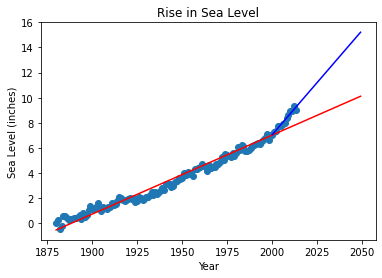

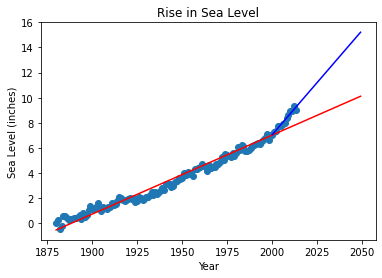

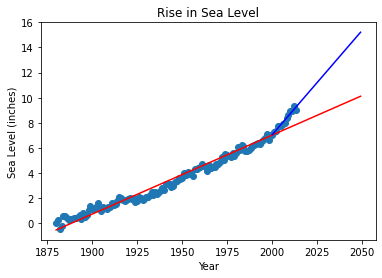

In [55]:
if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False)